I0000 00:00:1737752546.378965  275537 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1737752546.417540  294741 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737752546.426628  294741 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


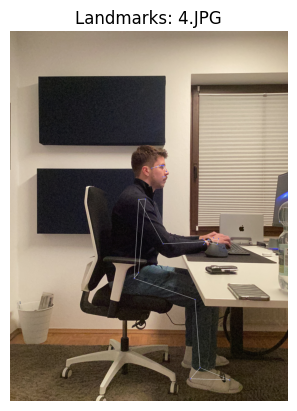

I0000 00:00:1737752546.587994  275537 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1737752546.625993  294755 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737752546.634182  294755 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


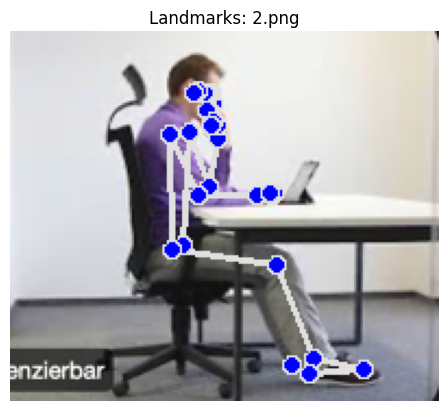

I0000 00:00:1737752546.687686  275537 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1737752546.726478  294776 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737752546.734256  294785 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


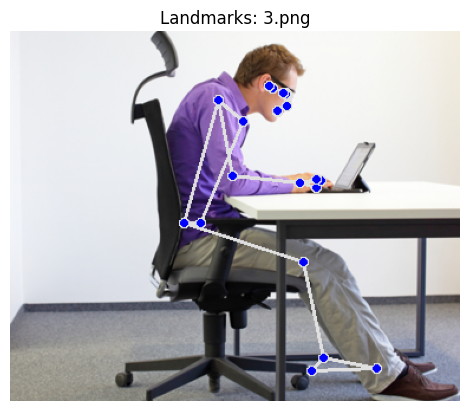

I0000 00:00:1737752546.783381  275537 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1737752546.820362  294788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1737752546.828562  294788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


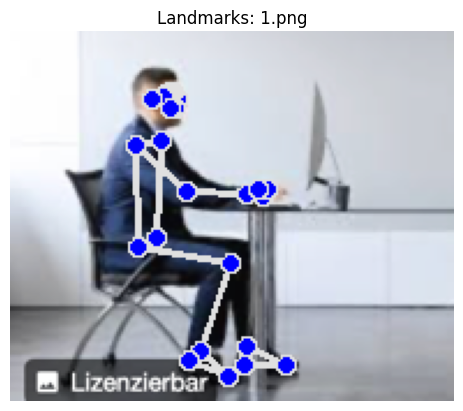

In [11]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

IMAGE_DIR = "data/raw_images"

image_files = [f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.jpg','.png'))]

for img_file in image_files:
    img_path = os.path.join(IMAGE_DIR, img_file)
    image_bgr = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    with mp_pose.Pose(static_image_mode=True) as pose_detector:
        results = pose_detector.process(image_rgb)
        if results.pose_landmarks:
            # Visual check
            annotated = image_rgb.copy()
            mp_drawing.draw_landmarks(
                annotated,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS
            )
            plt.figure()
            plt.imshow(annotated)
            plt.title(f"Landmarks: {img_file}")
            plt.axis("off")
            plt.show()
        else:
            print(f"No landmarks detected in {img_file}.")